<a href="https://colab.research.google.com/github/ucfilho/Metodos_Numericos_2021/blob/main/Mod_04_class_02_edp_parabolic_1D_jun_08_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# parabolic equation - 1D


\begin{eqnarray}
\frac{\partial u}{\partial t}  \ \ & = & \ D \frac{\partial^2 u}{\partial x^2}, \ \ & 0\leq x \leq 1   \nonumber \\
u(t,0) & = & u(t,1)=0 &  \ \ \ \ \ \ \forall t\nonumber\\
u(0,x) & = & 2x   &  \mathrm{if} \ \ x\leq 0.5 \nonumber\\
u(0,x) & = & 2(1-x)  & \mathrm{if} \ \ x> 0.5   \nonumber
\end{eqnarray}


\begin{equation}
\frac{u_{i,j+1}-u_{i,j}}{\Delta t} 
= \frac{D}{2} \left(\frac{u_{i+1,j+1}-2u_{i,j+1}+u_{i-1,j+1}}{\Delta x^2} + \frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{\Delta x^2}\right)
\end{equation}


$
-r u_{i-1,j+1} + (2+2r)u_{i,j+1} -r u_{i+1,j+1} =
 r  u_{i-1,j} + (2-2r) u_{i,j} + r u_{i+1,j} 
$

where:

$ r= \frac{D \Delta t}{\Delta x^2} $

$ A =
\left(
\begin{matrix}
2+2r & -r & & & \\
-r & 2+2r &  -r & 0 &\\
& & \ddots  & &  & \\
& 0 & -r & 2+2r & -r \\
& & & -r & 2+2r \\
\end{matrix}
\right) $


$ B = \left(
\begin{matrix}
2-2r & r & & & \\
r & 2-2r &  r & 0 &\\
& & \ddots  & &  & \\
&  0  & r & 2-2r & r \\
& & & r & 2-2r \\
\end{matrix}
\right)$

$
b
= \left(
\begin{matrix}
r u_{1,j} \\
0 \\
\vdots \\
0 \\
r u_{N,j} \\
\end{matrix}
\right)
$

$A.u^{t+1} = B.u^{t}+b$

In [ ]:
# http://www.claudiobellei.com/2016/11/10/crank-nicolson/

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


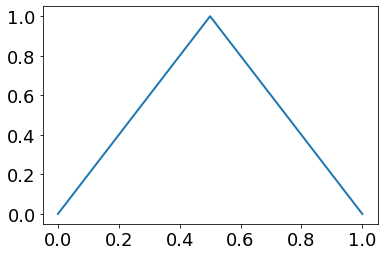

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib



matplotlib.rc('font', size=18)
matplotlib.rc('font', family='Arial')

#definition of numerical parameters
N = 51 #number of grid points
dt = 5.e-4 #time step
L = float(1) #size of grid
nsteps = 620 #number of time steps
dx = L/(N-1) #grid spacing
nplot = 20 #number of timesteps before plotting

r = dt/dx**2 #assuming heat diffusion coefficient == 1

#initialize matrices A, B and b array
A = np.zeros((N-2,N-2))
B = np.zeros((N-2,N-2))
b = np.zeros((N-2))
#define matrices A, B and b array
for i in range(N-2):
    if i==0:
        A[i,:] = [2+2*r if j==0 else (-r) if j==1 else 0 for j in range(N-2)]
        B[i,:] = [2-2*r if j==0 else r if j==1 else 0 for j in range(N-2)]
        b[i] = 0. #boundary condition at i=1
    elif i==N-3:
        A[i,:] = [-r if j==N-4 else 2+2*r if j==N-3 else 0 for j in range(N-2)]
        B[i,:] = [r if j==N-4 else 2-2*r if j==N-3 else 0 for j in range(N-2)]
        b[i] = 0. #boundary condition at i=N
    else:
        A[i,:] = [-r if j==i-1 or j==i+1 else 2+2*r if j==i else 0 for j in range(N-2)]
        B[i,:] = [r if j==i-1 or j==i+1 else 2-2*r if j==i else 0 for j in range(N-2)]

#initialize grid
x = np.linspace(0,1,N)
#initial condition
u = np.asarray([2*xx if xx<=0.5 else 2*(1-xx) for xx in x])
#evaluate right hand side at t=0
bb = B.dot(u[1:-1]) + b

fig = plt.figure()
plt.plot(x,u,linewidth=2)


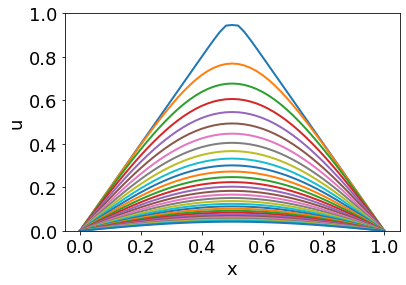

In [ ]:
for j in range(nsteps):
    u[1:-1] = np.linalg.solve(A,bb)
    bb = B.dot(u[1:-1]) + b
    if(j%nplot==0): #plot results every nplot timesteps
        plt.plot(x,u,linewidth=2)

plt.xlabel("x")
plt.ylabel("u")
plt.ylim([0,1])
plt.show()